数据集名称为01_heights_weights_genders

第一步：导入必要的库

In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



第二步：导入数据集

In [134]:
data = pd.read_csv('dataset\\01_heights_weights_genders.csv')
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


第三步：数据预处理

In [135]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
X = data[['Height','Weight']].values
y = data[['Gender']].values 
print(X.shape,y.shape)

(10000, 2) (10000, 1)


第四步：拆分训练集和测试集

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
m = len(X_train)
n = X_train.shape[1]
print(m,n)

(8000, 2) (2000, 2) (8000, 1) (2000, 1)
8000 2


第五步：特征标准化

In [137]:
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std



print(X_train_scaled.shape,((X_train - X_train_mean) / X_train_std).shape)

(8000, 2) (8000, 2)


In [138]:
print(y_train)

[[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]


第六步：实现梯度下降

Epoch 0: Loss=0.72, w=['0.501', '-0.115'], b=0.646
Epoch 100: Loss=0.46, w=['1.144', '1.213'], b=0.132
Epoch 200: Loss=0.37, w=['1.555', '1.960'], b=-0.215
Epoch 300: Loss=0.33, w=['1.835', '2.482'], b=-0.455
Epoch 400: Loss=0.30, w=['2.045', '2.880'], b=-0.639
Epoch 500: Loss=0.29, w=['2.212', '3.200'], b=-0.787
Epoch 600: Loss=0.28, w=['2.349', '3.467'], b=-0.912
Epoch 700: Loss=0.27, w=['2.464', '3.695'], b=-1.019
Epoch 800: Loss=0.26, w=['2.563', '3.893'], b=-1.113
Epoch 900: Loss=0.26, w=['2.649', '4.069'], b=-1.197
Epoch 1000: Loss=0.26, w=['2.725', '4.225'], b=-1.273
Epoch 1100: Loss=0.25, w=['2.792', '4.365'], b=-1.341
Epoch 1200: Loss=0.25, w=['2.852', '4.492'], b=-1.404
Epoch 1300: Loss=0.25, w=['2.906', '4.608'], b=-1.462
Epoch 1400: Loss=0.25, w=['2.955', '4.715'], b=-1.516
Epoch 1500: Loss=0.25, w=['2.999', '4.813'], b=-1.566
Epoch 1600: Loss=0.24, w=['3.039', '4.903'], b=-1.613
Epoch 1700: Loss=0.24, w=['3.076', '4.987'], b=-1.657
Epoch 1800: Loss=0.24, w=['3.109', '5.065

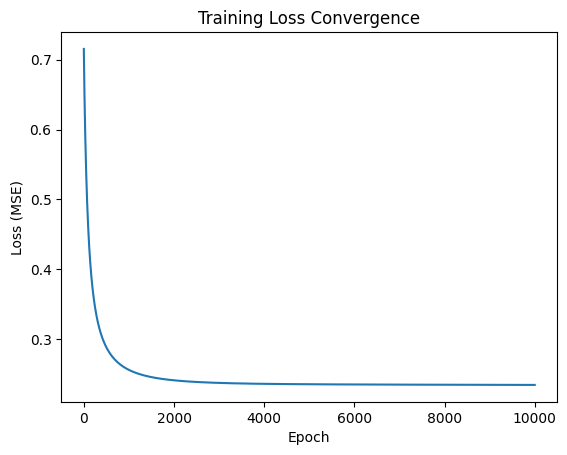

In [139]:
# 超参数设置
learning_rate = 0.1
epochs = 10000

# 参数初始化
np.random.seed(42)
w = np.random.randn(n).reshape(-1,1)
b = np.random.randn()

loss_history = []

# 梯度下降主循环
for epoch in range(epochs):
    # f(x)
    z = np.dot(X_train_scaled,w) + b
    y_pred = 1 / (1 + np.exp(-z))
    
    # cost function
    loss = - (1/m) * np.sum( y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred) )
    loss_history.append(loss)
    
    # dw, db
    dw = (1/m) * np.dot(X_train_scaled.T, (y_pred - y_train))
    db = (1/m) * np.sum(y_pred - y_train)
    
    # 迭代
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # 打印修改（展示所有参数）
    if epoch % 100 == 0:
        w_str = [f"{w[i][0]:.3f}" for i in range(n)]
        print(f"Epoch {epoch}: Loss={loss:.2f}, w={w_str}, b={b:.3f}")
        
# 绘制损失下降曲线
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Convergence")
plt.show()
    

最后，测试

In [140]:
# 使用训练好的参数对测试集进行预测
z_test = np.dot(X_test_scaled,w) + b
y_pred_test = 1 / (1 + np.exp(-z_test))

# 计算测试集上的损失（MSE）
test_loss = - (1/len(y_test)) * np.sum( y_test * np.log(y_pred_test) + (1 - y_test) * np.log(1 - y_pred_test) )
print(f"\nTest Loss : {test_loss:.2f}")



Test Loss : 0.21


In [143]:
male = (y_test.ravel() == 1) 
print(male)

[False  True  True ... False  True False]


画个图看看

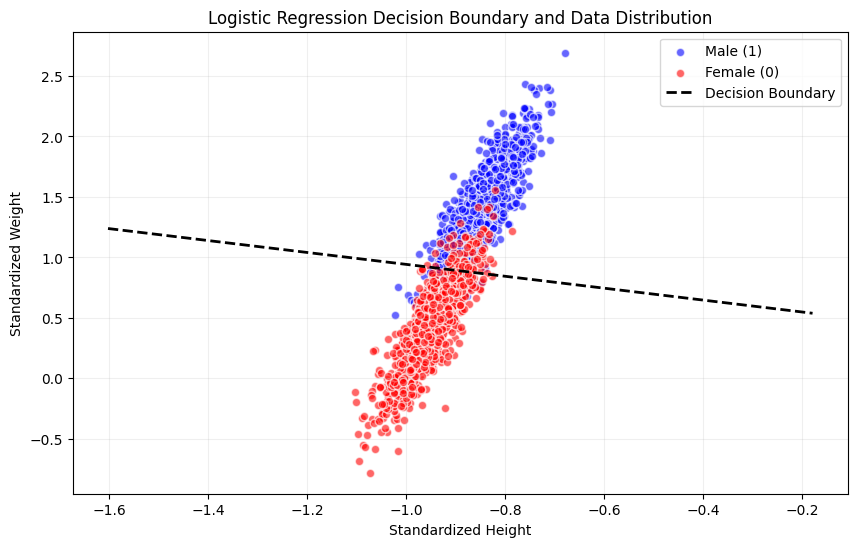

In [147]:


# --- 1. 绘制数据分布散点图 ---
plt.figure(figsize=(10, 6))

# 提取男性和女性样本的索引
male = (y_test.ravel() == 1)  # 将y_test转换为1D数组后比较
female = (y_test.ravel() == 0)

# 绘制散点图（标准化后的身高和体重）
plt.scatter(X_test_scaled[male, 0], X_test_scaled[male, 1], 
            c='blue', label='Male (1)', alpha=0.6, edgecolors='w')
plt.scatter(X_test_scaled[female, 0], X_test_scaled[female, 1], 
            c='red', label='Female (0)', alpha=0.6, edgecolors='w')

# --- 2. 绘制决策边界（逻辑回归的线性分界线） ---
# 生成x轴范围（标准化后的身高）
x_min, x_max = X_test_scaled[:, 0].min() - 0.5, X_test_scaled[:, 0].max() + 0.5
x_values = np.linspace(x_min, x_max, 100)


# 决策边界方程：w[0]*x + w[1]*y + b = 0 → y = (-w[0]/w[1])*x - b/w[1]
y_values = - (w[0] / w[1]) * x_values - (b / w[1])

# 绘制决策边界线
plt.plot(x_values, y_values, 'k--', lw=2, label='Decision Boundary')



# --- 4. 图表装饰 ---
plt.xlabel('Standardized Height')
plt.ylabel('Standardized Weight')
plt.title('Logistic Regression Decision Boundary and Data Distribution')
plt.legend(loc='best')
plt.grid(alpha=0.2)
plt.show()